## Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## Generate Data

In [2]:
samples = 500

np.random.seed(10)  ## seed for reproducibility

f1 = np.random.uniform(low=0, high=10, size=samples)  ## garbage feature
f2 = np.random.rand(samples)
f3 = np.random.binomial(n=1, p=0.5, size=samples)
f4 = None
f5 = np.random.normal(1, 2.5, samples)

d = {'f1':f1, 'f2':f2, 'f3':f3, 'f4':f4, 'f5':f5}

In [3]:
df = pd.DataFrame(d)
df['target'] = None
df.head()

,f1,f2,f3,f4,f5,target
0,7.713206,0.029655,0,None,4.924819,None
1,0.207519,0.011429,1,None,1.196322,None
2,6.336482,0.331844,0,None,1.097293,None
3,7.488039,0.061431,1,None,-2.579085,None
4,4.985070,0.598174,0,None,0.940324,None


In [4]:
# Set target values w/noise
for i, _ in df.iterrows():
    df.loc[i, 'target'] = df.loc[i, 'f2'] * df.loc[i, 'f3'] + df.loc[i, 'f5'] * df.loc[i, 'f3'] + np.random.rand() * 3
    df.loc[i, 'f4'] = df.loc[i, 'f2'] ** 2.8 + np.random.normal(loc=0, scale=1.25, size=1)
df['f4'] = df.f4.astype('float')
df['target'] = df.target.astype('float')

In [5]:
df.head()

,f1,f2,f3,f4,f5,target
0,7.713206,0.029655,0,0.264136,4.924819,0.702868
1,0.207519,0.011429,1,1.733111,1.196322,2.312985
2,6.336482,0.331844,0,-0.058088,1.097293,1.038181
3,7.488039,0.061431,1,-1.811233,-2.579085,0.034223
4,4.985070,0.598174,0,-0.003440,0.940324,1.857368


In [6]:
df.describe()

,f1,f2,f3,f4,f5,target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.923700,0.491640,0.490000,0.304817,1.012092,2.246115
std,2.873358,0.296912,0.500401,1.315015,2.486049,2.198764
min,0.017596,0.003332,0.000000,-3.035136,-6.781612,-5.806388
25%,2.499711,0.234979,0.000000,-0.588732,-0.675988,0.804056
50%,5.117005,0.476418,0.000000,0.174422,1.085952,1.860993
75%,7.530341,0.754721,1.000000,1.150247,2.610031,3.086710
max,9.952588,0.998639,1.000000,5.421022,7.982914,10.263172


In [7]:
df.corr()

,f1,f2,f3,f4,f5,target
f1,1.000000,0.112596,0.000791,-0.024837,0.005078,-0.007843
f2,0.112596,1.000000,0.062039,0.205076,0.118733,0.168944
f3,0.000791,0.062039,1.000000,0.024238,0.018359,0.373846
f4,-0.024837,0.205076,0.024238,1.000000,0.046057,0.097131
f5,0.005078,0.118733,0.018359,0.046057,1.000000,0.601053
target,-0.007843,0.168944,0.373846,0.097131,0.601053,1.000000


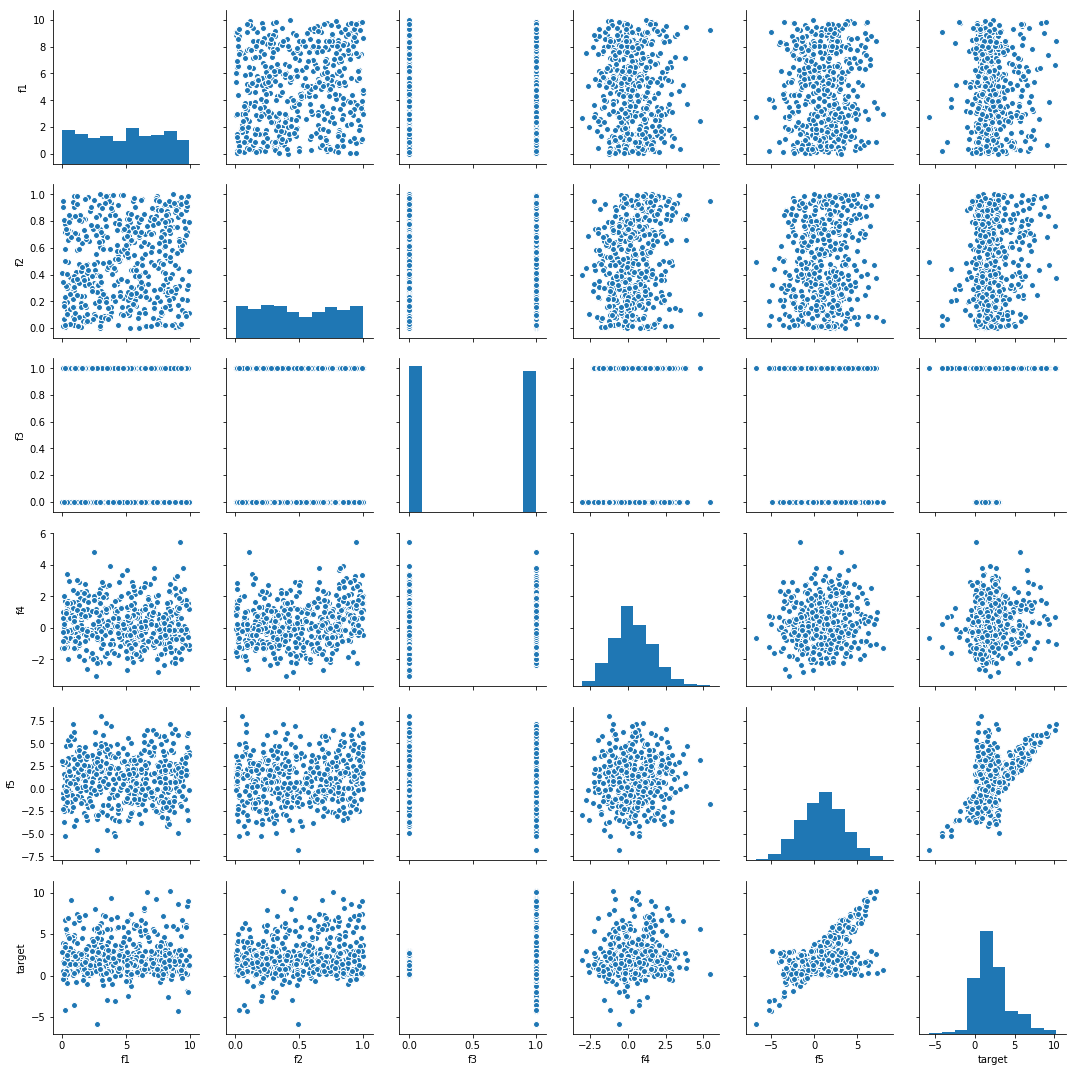

In [8]:
sns.pairplot(df);

## Train/Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['f1', 'f2', 'f3', 'f4', 'f5']], 
                                                    df['target'], 
                                                    test_size=0.2, 
                                                    random_state=42)

## StandardScale

In [10]:
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

## Modeling

In [11]:
lr = LinearRegression()
lasso = Lasso(alpha=0.01, random_state=42)
ridge = Ridge(alpha=0.01, random_state=42)

In [12]:
lr.fit(X_train_std, y_train)
lasso.fit(X_train_std, y_train)
ridge.fit(X_train_std, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

## Results

In [13]:
def pretty_print_coef(obj):
    print('intercept: {0:.4}'.format(obj.intercept_))
    print('coef: {0:.3} {1:.4} {2:.4} {3:.3} {4:.3}'.format(obj.coef_[0], 
                                                            obj.coef_[1], 
                                                            obj.coef_[2], 
                                                            obj.coef_[3],
                                                            obj.coef_[4]))

In [14]:
models = (lr, lasso, ridge)
for model in models:
    print(str(model))
    pretty_print_coef(model)
    print('R^2:', model.score(X_train_std, y_train))
    print('MSE:', mean_squared_error(y_test, model.predict(X_test_std)))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
intercept: 2.178
coef: -0.00261 0.1661 0.7658 0.13 1.28
R^2: 0.492252154276
MSE: 2.34524913104

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
intercept: 2.178
coef: -0.0 0.1586 0.7567 0.122 1.27
R^2: 0.492179837315
MSE: 2.34441835344

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)
intercept: 2.178
coef: -0.00261 0.1661 0.7658 0.13 1.28
R^2: 0.492252153983
MSE: 2.34525178792



In [15]:
np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) * -1)

2.5028679412006936

In [16]:
np.mean(cross_val_score(lasso, X_train_std, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) * -1)

2.4994068919979209

In [17]:
np.mean(cross_val_score(ridge, X_train_std, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) * -1)

2.5028643392704364

## Residuals

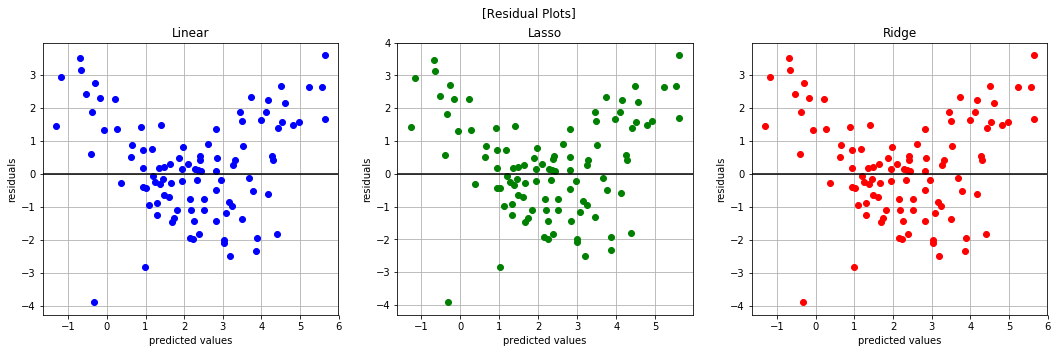

In [18]:
fig, axes = plt.subplots(1, 3, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(18,5)
axes[0].plot(lr.predict(X_test_std), y_test-lr.predict(X_test_std), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(lasso.predict(X_test_std), y_test-lasso.predict(X_test_std), 'go')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Lasso')
axes[1].set_xlabel('predicted values')
axes[1].set_ylabel('residuals')
axes[2].plot(ridge.predict(X_test_std), y_test-ridge.predict(X_test_std), 'ro')
axes[2].axhline(y=0, color='k')
axes[2].grid()
axes[2].set_title('Ridge')
axes[2].set_xlabel('predicted values')
axes[2].set_ylabel('residuals');

## Notes

We can tell from the residuals that there's signal that we're not catching with our current model. The reason is obvious in this case, because we know how the data was generated. The **target** is built on interaction terms.

## Random Forest (for fun)

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
mean_squared_error(y_test, rf.predict(X_test))

1.153955977238974

In [21]:
rf.feature_importances_

array([ 0.01542753,  0.02222971,  0.41577158,  0.01018187,  0.53638932])

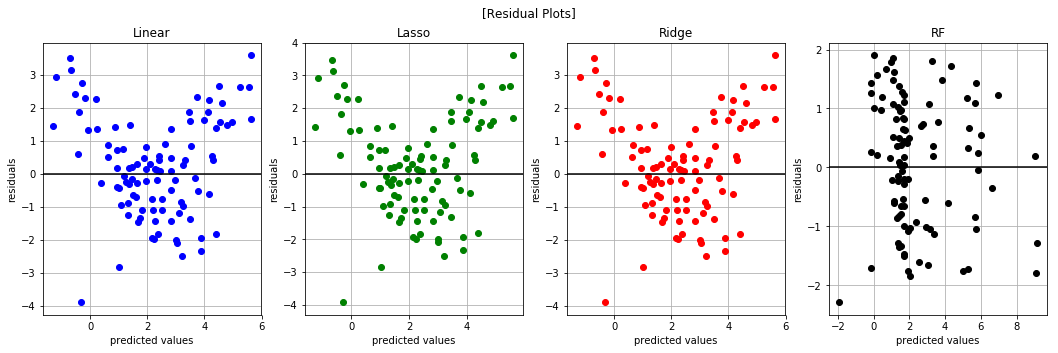

In [22]:
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(18,5)
axes[0].plot(lr.predict(X_test_std), y_test-lr.predict(X_test_std), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(lasso.predict(X_test_std), y_test-lasso.predict(X_test_std), 'go')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Lasso')
axes[1].set_xlabel('predicted values')
axes[1].set_ylabel('residuals')
axes[2].plot(ridge.predict(X_test_std), y_test-ridge.predict(X_test_std), 'ro')
axes[2].axhline(y=0, color='k')
axes[2].grid()
axes[2].set_title('Ridge')
axes[2].set_xlabel('predicted values')
axes[2].set_ylabel('residuals');
axes[3].plot(rf.predict(X_test), y_test-rf.predict(X_test), 'ko')
axes[3].axhline(y=0, color='k')
axes[3].grid()
axes[3].set_title('RF')
axes[3].set_xlabel('predicted values')
axes[3].set_ylabel('residuals');

While random forest does a better job catching the interaction between variables, we still see some pattern in the residuals meaning we haven't captured all the signal. Nonetheless, random forest is signficantly better than linear regression, lasso, and ridge on the raw features. We can combat this with feature engineering, however.